# Implementado uma rede neural para prever se um tumor é malígno ou não

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('/content/drive/MyDrive/deep_learning_udemy/entradas_breast.csv')
y = pd.read_csv('/content/drive/MyDrive/deep_learning_udemy/saidas_breast.csv')

In [3]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


## Implementando a rede neural

In [5]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [6]:
# divisão em treino e teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=42)

In [28]:
# implementado o classificador
clf = Sequential()
clf.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform',input_dim=30))
clf.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
clf.add(Dense(units=1, activation='sigmoid'))

# otimizador = tf.keras.optimizers.Adam(learning_rate=0.0005, decay=0.0001, clipvalue=0.5)

clf.compile(optimizer='adam', loss='binary_crossentropy',
            metrics=['binary_accuracy'])

clf.fit(X_treino,y_treino,
        batch_size=10,epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 0.8913 - binary_accuracy: 0.6005
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5328 - binary_accuracy: 0.6558
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4834 - binary_accuracy: 0.7035
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4585 - binary_accuracy: 0.7563
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4303 - binary_accuracy: 0.7588
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4130 - binary_accuracy: 0.8166
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3775 - binary_accuracy: 0.8643
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3564 - binary_accuracy: 0.8643
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3957 - binary_accuracy: 0.8090
Epoch 10/100
40/40 [==========================

- Avaliando o modelo

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_teste)

y_pred = (y_pred>0.5)
y_pred = y_pred*1
clf.evaluate(X_teste, y_teste)

6/6 [==============================] - 0s 2ms/step - loss: 0.2656 - binary_accuracy: 0.9357


[0.26563650369644165, 0.9356725215911865]

Text(33.0, 0.5, 'Valor Real')

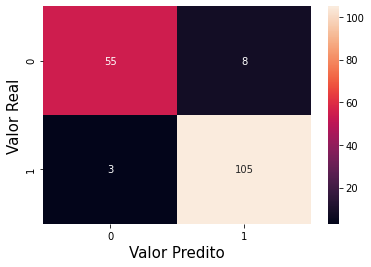

In [32]:
cm =confusion_matrix(y_teste, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valor Predito',fontsize=15)
plt.ylabel('Valor Real',fontsize=15)

- Validação cruzada

In [52]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [56]:
def rede_neural():
  clf = Sequential()
  clf.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform',input_dim=30))
  clf.add(Dense(units=16, activation='relu', kernel_initializer='random_uniform'))
  clf.add(Dense(units=1, activation='sigmoid'))

  # otimizador = tf.keras.optimizers.Adam(learning_rate=0.0005, decay=0.0001, clipvalue=0.5)

  clf.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['binary_accuracy'])
  return clf

clf.fit(X_treino,y_treino,
        )


classificador = KerasClassifier(build_fn=rede_neural,
                                batch_size=10,epochs=100)

resultados = cross_val_score(estimator=classificador, X = X, y = y,cv=10, scoring='accuracy')

13/13 [==============================] - 0s 3ms/step - loss: 0.1232 - binary_accuracy: 0.9422
Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.9327 - binary_accuracy: 0.6387
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4139 - binary_accuracy: 0.7949
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3541 - binary_accuracy: 0.8594
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3341 - binary_accuracy: 0.8594
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3418 - binary_accuracy: 0.8438
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2797 - binary_accuracy: 0.8965
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2578 - binary_accuracy: 0.8945
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2369 - binary_accuracy: 0.9023
Epoch 9/100
52/52 [==============================] - 0s 2m

In [57]:
resultados.std()

0.05946191215172927

In [58]:
resultados.mean()

0.8874686716791981